In [7]:
# combine two turtle files and visualize
from ontopy import World
world = World()

TBOX_IRI = "http://example.org/owl-client-relationship"
ABOX_IRI = "http://example.org/owl-client-relationship/abox"

world = World()

# 1. Preload TBox (classes/properties)
tbox = world.get_ontology(TBOX_IRI).load(
    filename="../relationship.ttl",
    format="turtle",
    only_local=True
)

# 2. Load ABox (individuals) that imports the TBox
abox = world.get_ontology(ABOX_IRI).load(
    filename="../client-eg1.ttl",
    format="turtle",
    only_local=True
)

print("TBox classes:", len(list(world.get_ontology("http://example.org/owl-client-relationship").classes())))
print("All individuals (ABox):", [i.name for i in abox.individuals()])
relationship = world.get_ontology("http://example.org/owl-client-relationship")
instances = abox

print('all classes: ', list(world.classes()))
print('all individuals: ', list(world.individuals()))



TBox classes: 6
All individuals (ABox): ['Ben', 'Adisa', 'Magesh', 'Terry', 'Adrian', 'Wade', 'Avinav', 'Travis']
all classes:  [owl-client-relationship.Client Manager, owl-client-relationship.Client, owl-client-relationship.Consultant, owl-client-relationship.Person, owl-client-relationship.Consultant Manager, owl-client-relationship.Organization]
all individuals:  [owl-client-relationship.Bitovi, owl-client-relationship.M Corp, owl-client-relationship.Ben, owl-client-relationship.Adisa, owl-client-relationship.Magesh, owl-client-relationship.Terry, owl-client-relationship.Adrian, owl-client-relationship.Wade, owl-client-relationship.Avinav, owl-client-relationship.Travis]


In [38]:
from ontopy.graph import OntoGraph
g = OntoGraph(abox, abox.Person, parents=3, relations='all', edgelabels=True, addnodes=True)

print(f"Graph nodes: {len(g.nodes)}")
print(f"Graph edges: {len(g.edges)}")
print("First few nodes:", list(g.nodes)[:25])

Graph nodes: 5
Graph edges: 4
First few nodes: ['Consultant', 'Consultant Manager', 'Thing', 'Person', 'Client Manager']


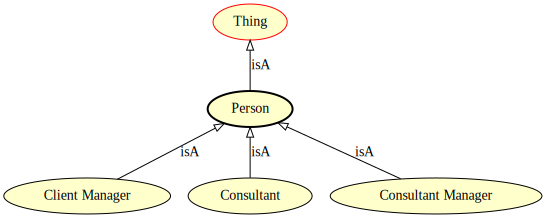

In [39]:
try:
    g.dot.render(format='svg', view=False)
    from IPython.display import SVG, display
    display(SVG(g.dot.pipe(format='svg')))
except:
    print("Graphviz not available, showing source code instead:")
    print(g.dot.source)

In [40]:
from ontopy.graph import OntoGraph, cytoscapegraph
graph = cytoscapegraph(g, onto=relationship)
display(graph)

Looks like you can't easily visualize individuals in the graph